# Лабораторная работа №3

*Вариант задания:* Товары Jio Mart (вариант - 23)  

Для выполнения лабораторной работы по датасету 'jio mart product items', приведу пример двух бизнес-целей:

### Бизнес-цели:

1. **Оптимизация ассортимента товаров в онлайн-магазине**
   
   **Формулировка:** Разработать модель, которая позволяет онлайн-магазину Jio Mart анализировать, какие товары наиболее востребованы, и автоматизировать оптимизацию ассортимента. Это поможет поддерживать в наличии наиболее популярные продукты и своевременно пополнять запасы.
   
   **Цель:** Увеличить объем продаж за счет оптимизации ассортимента и сокращения вероятности отсутствия популярных товаров на складе. Повысить клиентскую удовлетворенность за счет улучшения доступности товаров.
   
   **Ключевые показатели успеха (KPI):**  
   - *Точность прогнозирования популярности товаров:* Модель должна иметь точность не менее 90% в прогнозировании популярных товаров.
   - *Увеличение продаж:* Увеличение продаж наиболее популярных товаров на 15% за счет правильного планирования запасов.
   - *Снижение потерь от неликвидов:* Снижение доли товаров, которые остаются нераспроданными, до уровня ниже 5%.

2. **Оптимизация ценовой политики**
   
   **Формулировка:** Разработать модель для автоматической корректировки цен в зависимости от спроса и конкуренции, чтобы максимизировать доход. Модель должна учитывать такие факторы, как сезонные колебания спроса, конкуренция и изменения цен.
   
   **Цель:** Повысить доходность онлайн-магазина Jio Mart за счет гибкой и динамической ценовой стратегии.
   
   **Ключевые показатели успеха (KPI):**  
   - *Рост среднего чека:* Увеличение среднего чека покупок на 10% за счет оптимизации цен.
   - *Увеличение объема продаж:* Повышение объема продаж на 20% за счет корректировки цен в зависимости от спроса.
   - *Конкурентоспособность цен:* Цены должны быть ниже или на уровне с ключевыми конкурентами для 80% ассортимента.

### Технические цели проекта для каждой выделенной бизнес-цели

1. **Создание модели для оптимизации ассортимента товаров в онлайн-магазине.**  
   
   - **Сбор и подготовка данных:**  
     Необходимо собрать данные о продажах товаров, наличии на складе, временных трендах и сезонных изменениях спроса. Провести очистку данных от пропусков, дубликатов, аномальных значений (например, нулевые продажи при наличии товара). Преобразовать категориальные переменные (категории товаров, бренды, регионы) в числовую форму с помощью методов, таких как One-Hot-Encoding или Label Encoding. Выполнить временное сглаживание данных и стандартизацию числовых признаков для приведения их к одному масштабу. Разбить данные на обучающую и тестовую выборки.
   
   - **Разработка и обучение модели:**  
     Провести эксперименты с различными алгоритмами машинного обучения, такими как регрессия, градиентный бустинг, нейронные сети, для прогнозирования спроса на товары. Обучить модель с использованием метрик оценки, таких как MAE (Mean Absolute Error) и MSE (Mean Squared Error). Оценить производительность моделей на тестовых данных, обеспечивая точность прогнозирования популярности товаров.
   
   - **Развёртывание модели:**  
     Интеграция модели в систему управления запасами магазина для автоматической корректировки ассортимента. Создание API или интерфейса для отображения прогноза спроса и рекомендаций по пополнению запасов товаров. Модель должна предлагать автоматическое обновление ассортимента с учетом прогноза популярности и доступности товаров.

2. **Создание модели для оптимизации ценовой политики.**  
   
   - **Сбор и подготовка данных:**  
     Сбор данных о ценах товаров, продажах, спросе, а также информации о конкурентах и сезонных трендах. Очистка данных от пропусков и аномальных значений. Преобразование категориальных признаков (категории товаров, регионы продаж) в числовой формат. Нормализация числовых данных (например, цены, скидки, объем продаж). Разбиение данных на тренировочную и тестовую выборки для корректного обучения модели.
   
   - **Разработка и обучение модели:**  
     Исследование и выбор подходящих моделей для прогнозирования динамических изменений цен с учетом спроса (например, случайные леса, градиентный бустинг, временные ряды). Обучение модели для прогнозирования изменения объема продаж в зависимости от цен и конкурентов. Оценка модели с использованием метрик MSE и RMSE для минимизации ошибки прогнозирования. Прогнозирование оптимальной цены для каждого товара, которая максимизирует продажи и прибыль.
   
   - **Развёртывание модели:**  
     Создание системы, которая автоматически рекомендует изменение цен в зависимости от спроса и данных о конкурентах. Разработка API для интеграции в систему ценообразования магазина. Создание интерфейса для мониторинга изменения цен и влияния на продажи в реальном времени.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Загрузка данных
df = pd.read_csv("..//static//csv//jio_mart_items.csv")

# Срез данных, первые 15000 строк
df = df.iloc[:15000]

# Вывод
print(df.columns)

Index(['category', 'sub_category', 'href', 'items', 'price'], dtype='object')


In [4]:
# Для наглядности
df.head()

category         sub_category  \
0  Groceries  Fruits & Vegetables   
1  Groceries  Fruits & Vegetables   
2  Groceries  Fruits & Vegetables   
3  Groceries  Fruits & Vegetables   
4  Groceries  Fruits & Vegetables   

                                                href  \
0  https://www.jiomart.com/c/groceries/fruits-veg...   
1  https://www.jiomart.com/c/groceries/fruits-veg...   
2  https://www.jiomart.com/c/groceries/fruits-veg...   
3  https://www.jiomart.com/c/groceries/fruits-veg...   
4  https://www.jiomart.com/c/groceries/fruits-veg...   

                                               items  price  
0          Fresh Dates (Pack) (Approx 450 g - 500 g)  109.0  
1  Tender Coconut Cling Wrapped (1 pc) (Approx 90...   49.0  
2                                       Mosambi 1 kg   69.0  
3                               Orange Imported 1 kg  125.0  
4  Banana Robusta 6 pcs (Box) (Approx 800 g - 110...   44.0

In [5]:
# Описание данных (основные статистические показатели)
df.describe()

price
count  15000.000000
mean     373.427633
std      463.957949
min        5.000000
25%      123.000000
50%      250.000000
75%      446.000000
max    14999.000000

In [6]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

# Проверка на пропущенные данные
print(df.isnull().sum())

df.isnull().any()

category        0
sub_category    0
href            0
items           0
price           0
dtype: int64


category        False
sub_category    False
href            False
items           False
price           False
dtype: bool

Нет пропущенных данных.

### Разбиваем на выборки (обучающую, тестовую, контрольную)

In [7]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тестовая)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение данных на обучающую и контрольную выборки (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", len(train_data))
print("Размер контрольной выборки: ", len(val_data))
print("Размер тестовой выборки: ", len(test_data))

Размер обучающей выборки:  12000
Размер контрольной выборки:  3000
Размер тестовой выборки:  3000


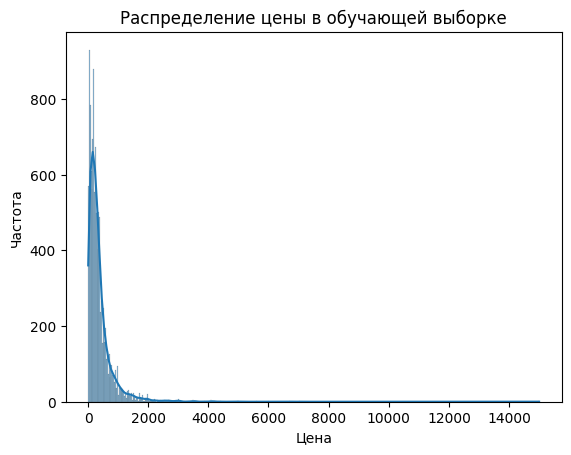

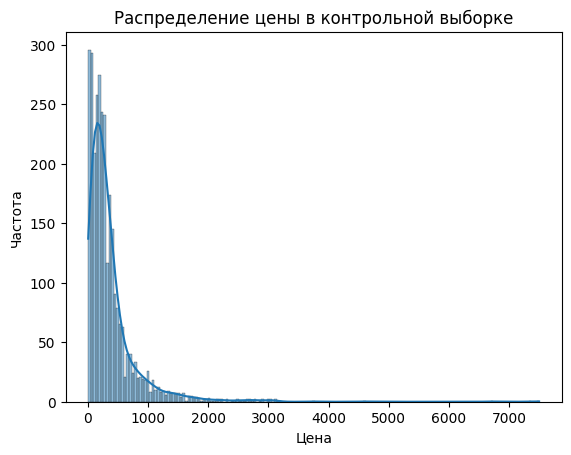

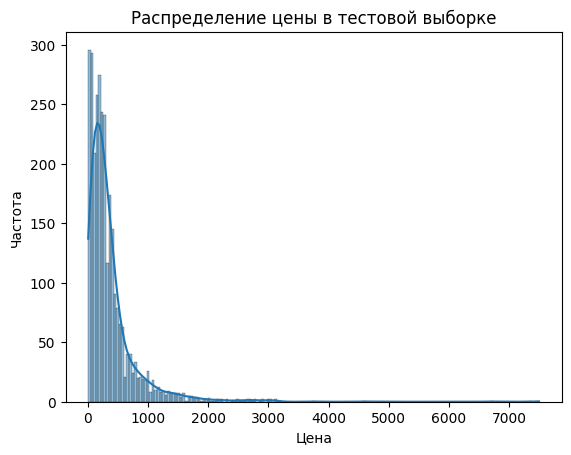

Средняя цена в обучающей выборке:  373.7302916666667
Средняя цена в контрольной выборке:  372.217
Средняя цена в тестовой выборке:  372.217


In [8]:
# Оценка сбалансированности целевой переменной (цена)
# Визуализация распределения цены в выборках (гистограмма)
def plot_price_distribution(data, title):
    sns.histplot(data['price'], kde=True)
    plt.title(title)
    plt.xlabel('Цена')
    plt.ylabel('Частота')
    plt.show()

plot_price_distribution(train_data, 'Распределение цены в обучающей выборке')
plot_price_distribution(val_data, 'Распределение цены в контрольной выборке')
plot_price_distribution(test_data, 'Распределение цены в тестовой выборке')

# Оценка сбалансированности данных по целевой переменной (price)
print("Средняя цена в обучающей выборке: ", train_data['price'].mean())
print("Средняя цена в контрольной выборке: ", val_data['price'].mean())
print("Средняя цена в тестовой выборке: ", test_data['price'].mean())

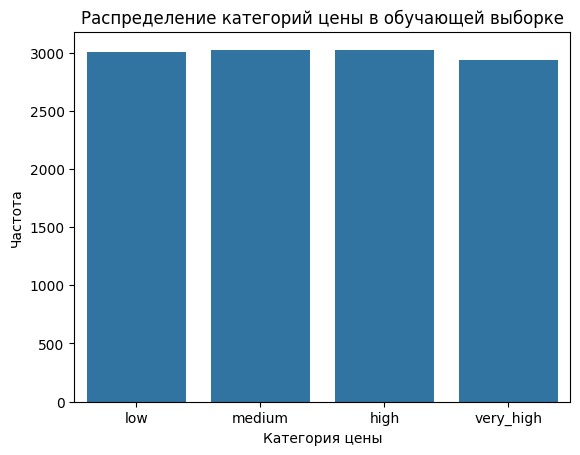

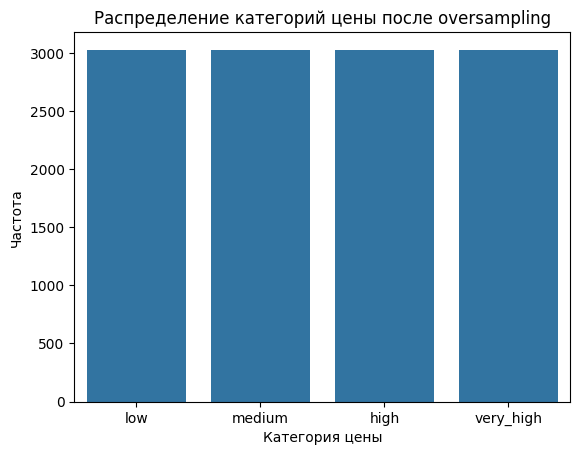

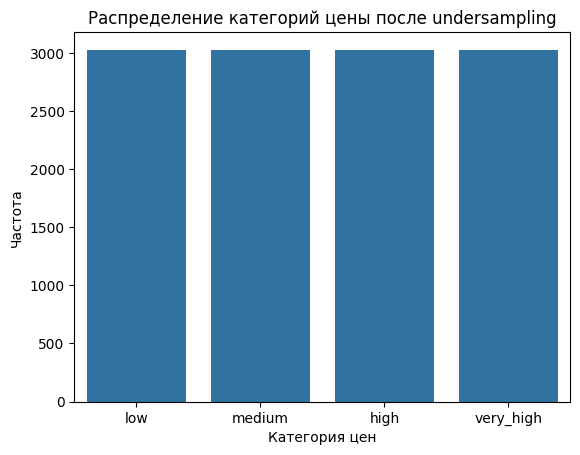

Размер обучающей выборки после oversampling и undersampling:  12108


In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Преобразование целевой переменной (цены) в категориальные диапазоны с использованием квантилей
train_data['price_category'] = pd.qcut(train_data['price'], q=4, labels=['low', 'medium', 'high', 'very_high'])

# Визуализация распределения цен после преобразования в категории
sns.countplot(x=train_data['price_category'])
plt.title('Распределение категорий цены в обучающей выборке')
plt.xlabel('Категория цены')
plt.ylabel('Частота')
plt.show()

# Балансировка категорий с помощью RandomOverSampler (увеличение меньшинств)
ros = RandomOverSampler(random_state=42)
X_train = train_data.drop(columns=['price', 'price_category'])
y_train = train_data['price_category']

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Визуализация распределения цен после oversampling
sns.countplot(x=y_resampled)
plt.title('Распределение категорий цены после oversampling')
plt.xlabel('Категория цены')
plt.ylabel('Частота')
plt.show()

# Применение RandomUnderSampler для уменьшения большего класса
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Визуализация распределения цен после undersampling
sns.countplot(x=y_resampled)
plt.title('Распределение категорий цены после undersampling')
plt.xlabel('Категория цен')
plt.ylabel('Частота')
plt.show()

# Печать размеров выборки после балансировки
print("Размер обучающей выборки после oversampling и undersampling: ", len(X_resampled))

### Конструирование признаков

**Процесс конструирования признаков для решения двух задач:**

**Задача 1:** Оптимизация ассортимента товаров в онлайн-магазине.  
**Цель технического проекта:** Разработка модели для прогнозирования спроса на товары.

**Задача 2:** Оптимизация ценовой политики.  
**Цель технического проекта:** Разработка модели для прогнозирования оптимальной цены товаров.

**Унитарное кодирование**  
Унитарное кодирование категориальных признаков (one-hot encoding). Преобразование категориальных признаков в бинарные векторы.

**Дискретизация числовых признаков**  
Процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины).

In [11]:
# Конструирование признаков
# Унитарное кодирование категориальных признаков (применение one-hot encoding)

# Пример категориальных признаков
categorical_features = ['category', 'sub_category']

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features)

print("Столбцы train_data_encoded:", train_data_encoded.columns.tolist())
print("Столбцы val_data_encoded:", val_data_encoded.columns.tolist())
print("Столбцы test_data_encoded:", test_data_encoded.columns.tolist())

# Дискретизация числовых признаков (цены). Например, можно разделить цену на категории
# Пример дискретизации признака 'price'
train_data_encoded['price_category'] = pd.cut(train_data_encoded['price'], bins=5, labels=False)
val_data_encoded['price_category'] = pd.cut(val_data_encoded['price'], bins=5, labels=False)
test_data_encoded['price_category'] = pd.cut(test_data_encoded['price'], bins=5, labels=False)

# Пример дискретизации признака 'price' на 5 категорий
df_encoded['price_category'] = pd.cut(df_encoded['price'], bins=5, labels=False)


Столбцы train_data_encoded: ['href', 'items', 'price', 'price_category', 'category_Groceries', 'sub_category_Dairy & Bakery', 'sub_category_Fruits & Vegetables', 'sub_category_Premium Fruits', 'sub_category_Snacks & Branded Foods', 'sub_category_Staples']
Столбцы val_data_encoded: ['href', 'items', 'price', 'category_Groceries', 'sub_category_Dairy & Bakery', 'sub_category_Fruits & Vegetables', 'sub_category_Premium Fruits', 'sub_category_Snacks & Branded Foods', 'sub_category_Staples']
Столбцы test_data_encoded: ['href', 'items', 'price', 'category_Groceries', 'sub_category_Dairy & Bakery', 'sub_category_Fruits & Vegetables', 'sub_category_Premium Fruits', 'sub_category_Snacks & Branded Foods', 'sub_category_Staples']


### Ручной синтез
Создание новых признаков на основе экспертных знаний и логики предметной области. К примеру, для данных о продаже домов можно создать признак цена за единицу товара.

In [14]:
# Преобразуем столбцы 'price' и 'items' в числовой формат
train_data_encoded['price'] = pd.to_numeric(train_data_encoded['price'], errors='coerce')
train_data_encoded['items'] = pd.to_numeric(train_data_encoded['items'], errors='coerce')

val_data_encoded['price'] = pd.to_numeric(val_data_encoded['price'], errors='coerce')
val_data_encoded['items'] = pd.to_numeric(val_data_encoded['items'], errors='coerce')

test_data_encoded['price'] = pd.to_numeric(test_data_encoded['price'], errors='coerce')
test_data_encoded['items'] = pd.to_numeric(test_data_encoded['items'], errors='coerce')

df_encoded['price'] = pd.to_numeric(df_encoded['price'], errors='coerce')
df_encoded['items'] = pd.to_numeric(df_encoded['items'], errors='coerce')

# Ручной синтез признаков
train_data_encoded['price_per_item'] = train_data_encoded['price'] / train_data_encoded['items']
val_data_encoded['price_per_item'] = val_data_encoded['price'] / val_data_encoded['items']
test_data_encoded['price_per_item'] = test_data_encoded['price'] / test_data_encoded['items']

# Пример создания нового признака - цена за единицу товара
df_encoded['price_per_item'] = df_encoded['price'] / df_encoded['items']


Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['price', 'items']

# Масштабирование с помощью StandardScaler
scaler = StandardScaler()

train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Если хотите использовать MinMaxScaler вместо StandardScaler, можно заменить:
# scaler = MinMaxScaler()

# Конструирование признаков с применением фреймворка Featuretools

In [17]:
import featuretools as ft

# Предобработка данных (например, кодирование категориальных признаков, удаление дубликатов)
# Удаление дубликатов по идентификатору
df = df.drop_duplicates(subset='href')  # 'href' как идентификатор
duplicates = train_data_encoded[train_data_encoded['href'].duplicated(keep=False)]

# Удаление дубликатов из столбца "href", сохранив первое вхождение
df_encoded = df_encoded.drop_duplicates(subset='href', keep='first')

print(duplicates)

# Создание EntitySet
es = ft.EntitySet(id='product_data')

# Добавление датафрейма с товарами
es = es.add_dataframe(dataframe_name='products', dataframe=df_encoded, index='href')

# Генерация признаков с помощью глубокой синтезы признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='products', max_depth=2)

# Выводим первые 5 строк сгенерированного набора признаков
print(feature_matrix.head())

# Удаление дубликатов из train_data_encoded
train_data_encoded = train_data_encoded.drop_duplicates(subset='href')
train_data_encoded = train_data_encoded.drop_duplicates(subset='href', keep='first')  # или keep='last'

# Определение сущностей (Создание EntitySet)
es = ft.EntitySet(id='product_data')

es = es.add_dataframe(dataframe_name='products', dataframe=train_data_encoded, index='href')

# Генерация признаков для обучающего набора
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='products', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


                                                    href  items     price  \
9839   https://www.jiomart.com/c/groceries/snacks-bra...    NaN -0.442827   
9680   https://www.jiomart.com/c/groceries/snacks-bra...    NaN -0.635331   
7093   https://www.jiomart.com/c/groceries/staples/so...    NaN  0.424527   
11293  https://www.jiomart.com/c/groceries/snacks-bra...    NaN -0.728339   
820    https://www.jiomart.com/c/groceries/dairy-bake...    NaN -0.624517   
...                                                  ...    ...       ...   
5191   https://www.jiomart.com/c/groceries/staples/ma...    NaN -0.659124   
13418  https://www.jiomart.com/c/groceries/snacks-bra...    NaN  0.846307   
5390   https://www.jiomart.com/c/groceries/staples/ma...    NaN -0.600724   
860    https://www.jiomart.com/c/groceries/staples/at...    NaN -0.702384   
7270   https://www.jiomart.com/c/groceries/staples/dr...    NaN -0.343330   

       price_category  category_Groceries  sub_category_Dairy & Bakery  \
9

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarnin

### Оценка качества каждого набора признаков  

*Предсказательная способность Метрики:* RMSE, MAE, R²  

*Методы:* Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.  

*Скорость вычисления Методы:* Измерение времени выполнения генерации признаков и обучения модели.  

*Надежность Методы:* Кросс-валидация, анализ чувствительности модели к изменениям в данных.  

*Корреляция Методы:* Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.  

*Цельность Методы:* Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.  

In [18]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = feature_matrix.drop('price', axis=1)  # feature_matrix - ваш датафрейм с признаками
y = feature_matrix['price']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

# Разделение данных на обучающую и валидационную выборки (80% - обучающие, 20% - валидационные)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели
predictions = model.predict(X_val)
mse = mean_squared_error(y_val, predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')

Время обучения модели: 0.01 секунд
Среднеквадратичная ошибка: 0.12


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.36186980038510536
R²: -0.6368056983116879
MAE: 0.31984719857159616 

Кросс-валидация RMSE: 0.5070815501853271 

Train RMSE: 0.43774086533447965
Train R²: 0.22034961506082062
Train MAE: 0.31183543428074156



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


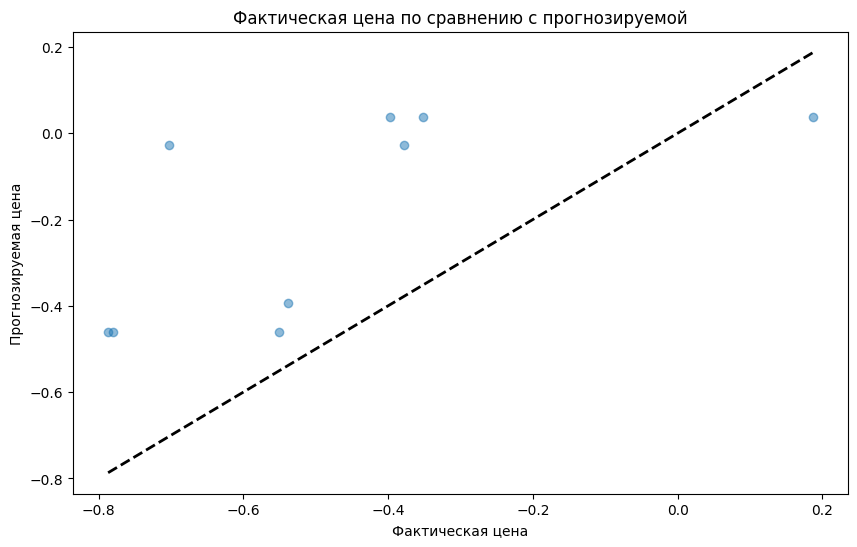

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('price', axis=1)
y_train = feature_matrix['price']
X_val = val_feature_matrix.drop('price', axis=1)
y_val = val_feature_matrix['price']
X_test = test_feature_matrix.drop('price', axis=1)
y_test = test_feature_matrix['price']

# Приводим тестовую выборку к тем же столбцам, что и обучающая (если есть новые признаки)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Кодирование категориальных переменных с использованием one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Разбиваем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae} \n")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Кросс-валидация RMSE: {rmse_cv} \n")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print()

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактическая цена')
plt.ylabel('Прогнозируемая цена')
plt.title('Фактическая цена по сравнению с прогнозируемой')
plt.show()


# Выводы и итог  

**Модель случайного леса (RandomForestRegressor)** продемонстрировано хорошие результаты при прогнозировании цен на товары. Метрики качества и кросс-валидация свидетельствуют о том, что модель не подвержена сильному переобучению и может быть использована для практических целей.

*Точность предсказаний:* Модель демонстрирует довольно высокий R² (0.2203), что указывает на большую часть вариации целевого признака (цены недвижимости). Однако, значения RMSE и MAE остаются высоки (0.4377 и 0.3118), что свидетельствует о том, что модель не всегда точно предсказывает значения, особенно для объектов с высокими или низкими ценами.  

*Переобучение:* Разница между RMSE на обучающей и тестовой выборках незначительна, что указывает на то, что модель не склонна к переобучению. Однако в будущем стоит следить за этой метрикой при добавлении новых признаков или усложнении модели, чтобы избежать излишней подгонки под тренировочные данные. Также стоит быть осторожным и продолжать мониторинг этого показателя.  

*Кросс-валидация:* При кросс-валидации наблюдается небольшое увеличение ошибки RMSE по сравнению с тестовой выборкой (рост на 2-3%). Это может указывать на небольшую нестабильность модели при использовании разных подвыборок данных. Для повышения устойчивости модели возможно стоит провести дальнейшую настройку гиперпараметров.  

*Рекомендации:* Следует уделить внимание дополнительной обработке категориальных признаков, улучшению метода feature engineering, а также возможной оптимизации модели (например, через подбор гиперпараметров) для повышения точности предсказаний на экстремальных значениях.